In [2]:
# Common helper for all notebooks
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

%matplotlib inline
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (8,5)
sns.set(style="whitegrid")

os.makedirs("plots", exist_ok=True)

def report_shape(stage, df):
    print(f"{stage}: {df.shape[0]} rows, {df.shape[1]} columns")


In [3]:
!ls /content

drive  healthcare-dataset-stroke-data.csv  plots  sample_data


Original: 5110 rows, 12 columns

Missing values per column:
bmi                  201
id                     0
age                    0
gender                 0
hypertension           0
heart_disease          0
work_type              0
ever_married           0
Residence_type         0
avg_glucose_level      0
smoking_status         0
stroke                 0
dtype: int64
After missing handling + label encoding: 5110 rows, 17 columns


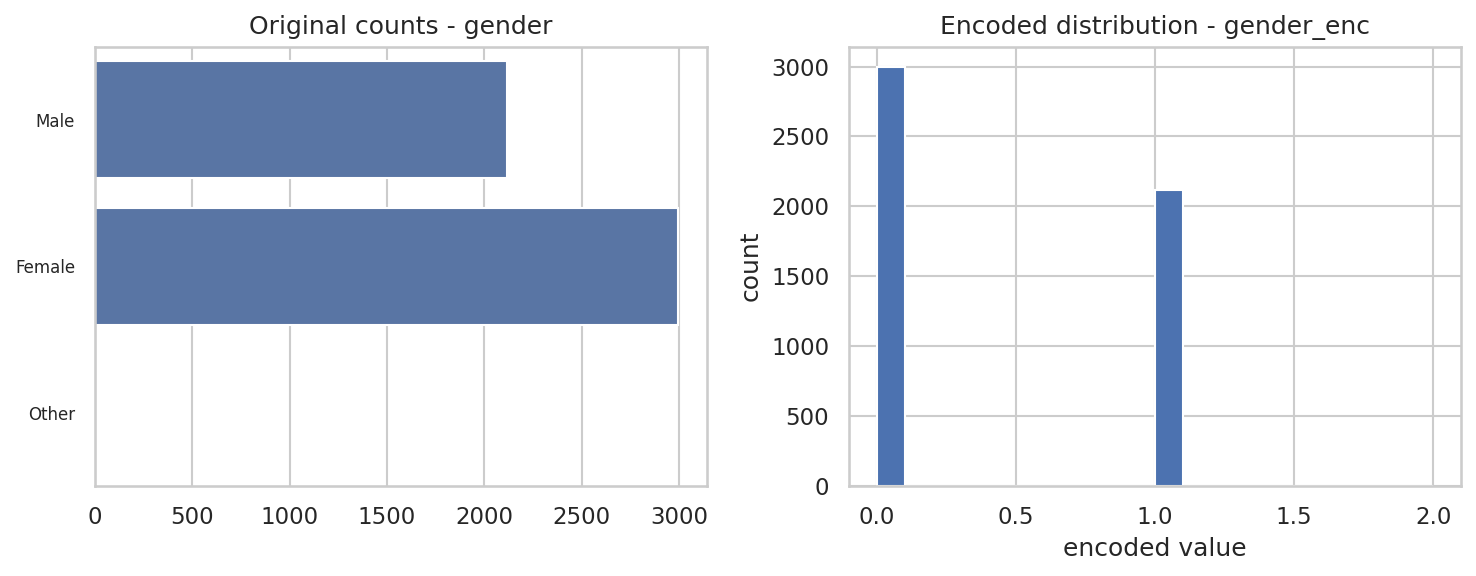

Saved: data/processed/member1_missing_labelencoded.csv


In [4]:
# Member 1 IT24101982- Ramshan M.L.M : Missing handling + label encoding
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

%matplotlib inline
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (8,5)
sns.set(style="whitegrid")

os.makedirs("plots", exist_ok=True)

def report_shape(stage, df):
    print(f"{stage}: {df.shape[0]} rows, {df.shape[1]} columns")


df = pd.read_csv("healthcare-dataset-stroke-data.csv")
report_shape("Original", df)

print("\nMissing values per column:")
print(df.isnull().sum().sort_values(ascending=False))

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()

#Filling with the median
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

#Filling catogarical as "Missing"
cat_imputer = SimpleImputer(strategy='constant', fill_value='Missing')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

#Label encoding
label_enc = LabelEncoder()
for c in cat_cols:
    df[c + "_enc"] = label_enc.fit_transform(df[c].astype(str))

report_shape("After missing handling + label encoding", df)

#EDA
if cat_cols:
    c = cat_cols[0]
    fig, axes = plt.subplots(1,2, figsize=(10,4))

    sns.countplot(y=df[c], ax=axes[0])
    axes[0].set_title(f"Original counts - {c}")
    axes[0].tick_params(axis='y', labelsize=8)
    axes[0].set_xlabel("")
    axes[0].set_ylabel("")

    axes[1].hist(df[c + "_enc"], bins=20)
    axes[1].set_title(f"Encoded distribution - {c}_enc")
    axes[1].set_xlabel("encoded value")
    axes[1].set_ylabel("count")

    plt.tight_layout()
    plt.savefig("plots/member1_encoding_comparison.png")
    plt.show()

os.makedirs("data/processed", exist_ok=True)
df.to_csv("data/processed/member1_missing_labelencoded.csv", index=False)
print("Saved: data/processed/member1_missing_labelencoded.csv")


Original: 5110 rows, 17 columns
Categorical columns: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
gender unique values: ['Male' 'Female' 'Other']
ever_married unique values: ['Yes' 'No']
work_type unique values: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type unique values: ['Urban' 'Rural']
smoking_status unique values: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
After One-Hot encoding: 5110 rows, 28 columns

Showing sample table for dummies of 'gender':


,gender_enc,gender_Female,gender_Male,gender_Other
0,1,0,1,0
1,0,1,0,0
2,1,0,1,0
3,0,1,0,0
4,0,1,0,0
5,1,0,1,0
6,1,0,1,0
7,0,1,0,0
8,0,1,0,0
9,0,1,0,0


Saved sample of encoded table to: plots/member2_onehot_table_sample.csv


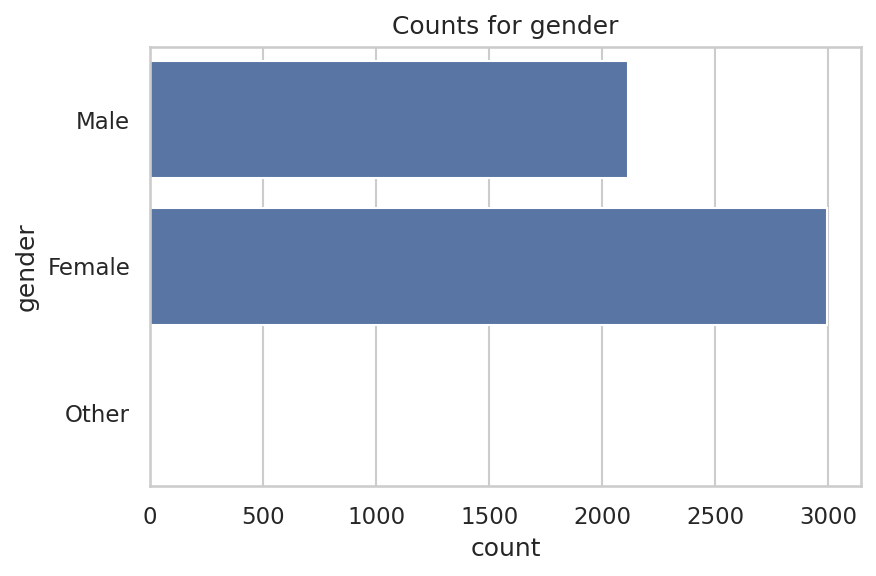

Saved encoded dataset to: data/processed/member2_onehot.csv


In [7]:
# Member 2 IT24101896- Abeywickrama J.B: One-Hot encoding

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (8,5)
sns.set(style="whitegrid")

def report_shape(stage, df):
    print(f"{stage}: {df.shape[0]} rows, {df.shape[1]} columns")

os.makedirs("plots", exist_ok=True)
os.makedirs("data/processed", exist_ok=True)

df = pd.read_csv("data/processed/member1_missing_labelencoded.csv")
report_shape("Original", df)

cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
print("Categorical columns:", cat_cols)

df[cat_cols] = df[cat_cols].fillna("Missing")

for col in cat_cols:
    print(f"{col} unique values:", df[col].unique())

#One hot encoding
df_ohe = pd.get_dummies(df, columns=cat_cols, drop_first=False).astype(int)
report_shape("After One-Hot encoding", df_ohe)

if cat_cols:
    first_cat = cat_cols[0]
    dummy_cols = [c for c in df_ohe.columns if c.startswith(first_cat + "_")]
    if len(dummy_cols) == 0:
        print("No dummy columns found for", first_cat)
    else:
        print(f"\nShowing sample table for dummies of '{first_cat}':")
        display(df_ohe[dummy_cols].head(10))
        df_ohe[dummy_cols].head(200).to_csv("plots/member2_onehot_table_sample.csv", index=False)
        print("Saved sample of encoded table to: plots/member2_onehot_table_sample.csv")

#EDA
if cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(y=df[first_cat].astype(str))
    plt.title(f"Counts for {first_cat}")
    plt.tight_layout()
    plt.savefig("plots/member2_counts_first_cat.png", bbox_inches='tight')
    plt.show()

csv_path = "data/processed/member2_onehot.csv"
df_ohe.to_csv(csv_path, index=False)
print(f"Saved encoded dataset to: {csv_path}")




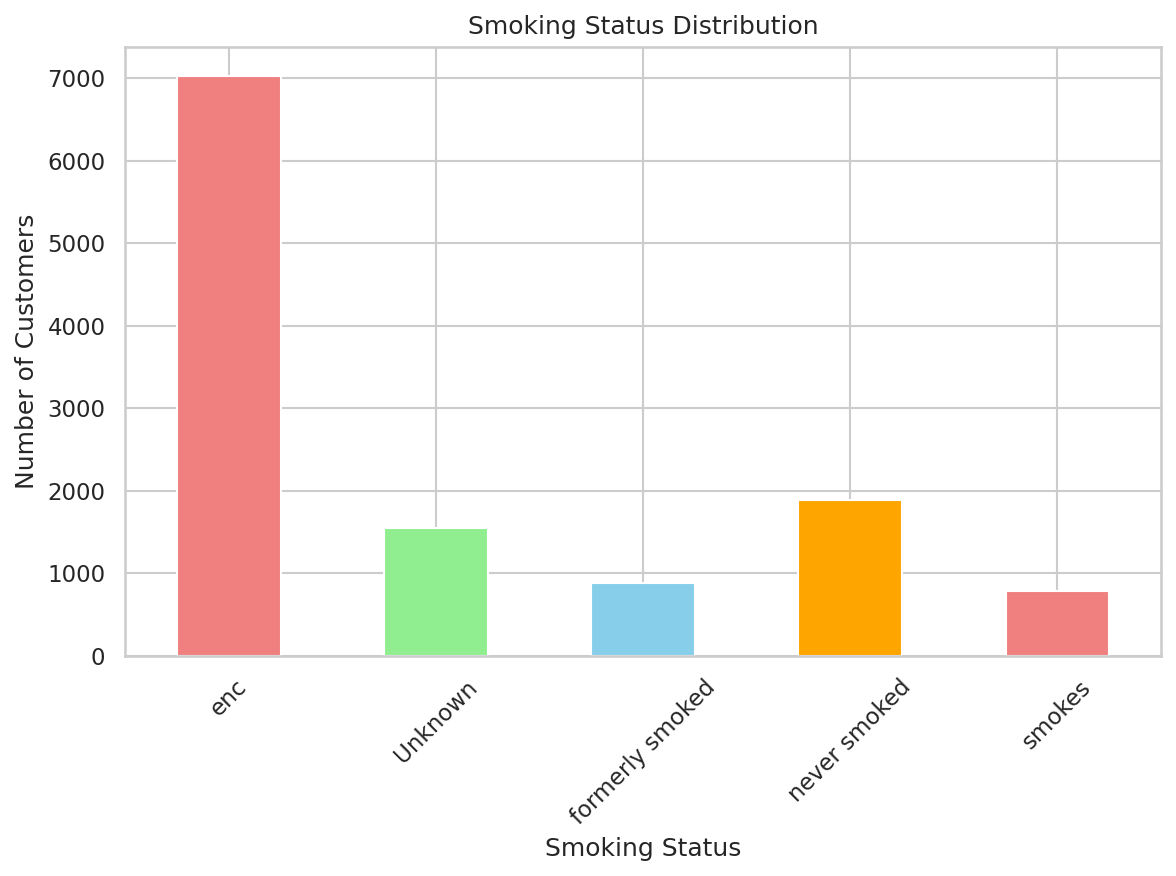

In [6]:
smoking_status_cols = [col for col in df_ohe.columns if col.startswith('smoking_status_')]

smoking_status_counts = {}
for col in smoking_status_cols:
    smoking_status_counts[col.replace('smoking_status_', '')] = df_ohe[col].sum()

smoking_status_counts = pd.Series(smoking_status_counts)
plt.figure(figsize=(8, 6))
smoking_status_counts.plot(kind='bar', color=['lightcoral', 'lightgreen', 'skyblue', 'orange'])
plt.title('Smoking Status Distribution')
plt.xlabel('Smoking Status')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()

save_path = 'plots/member2_smoking_status_distribution.png'
os.makedirs(os.path.dirname(save_path), exist_ok=True)
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

Original: 5110 rows, 28 columns
Continuous numeric columns: ['age', 'avg_glucose_level', 'bmi']


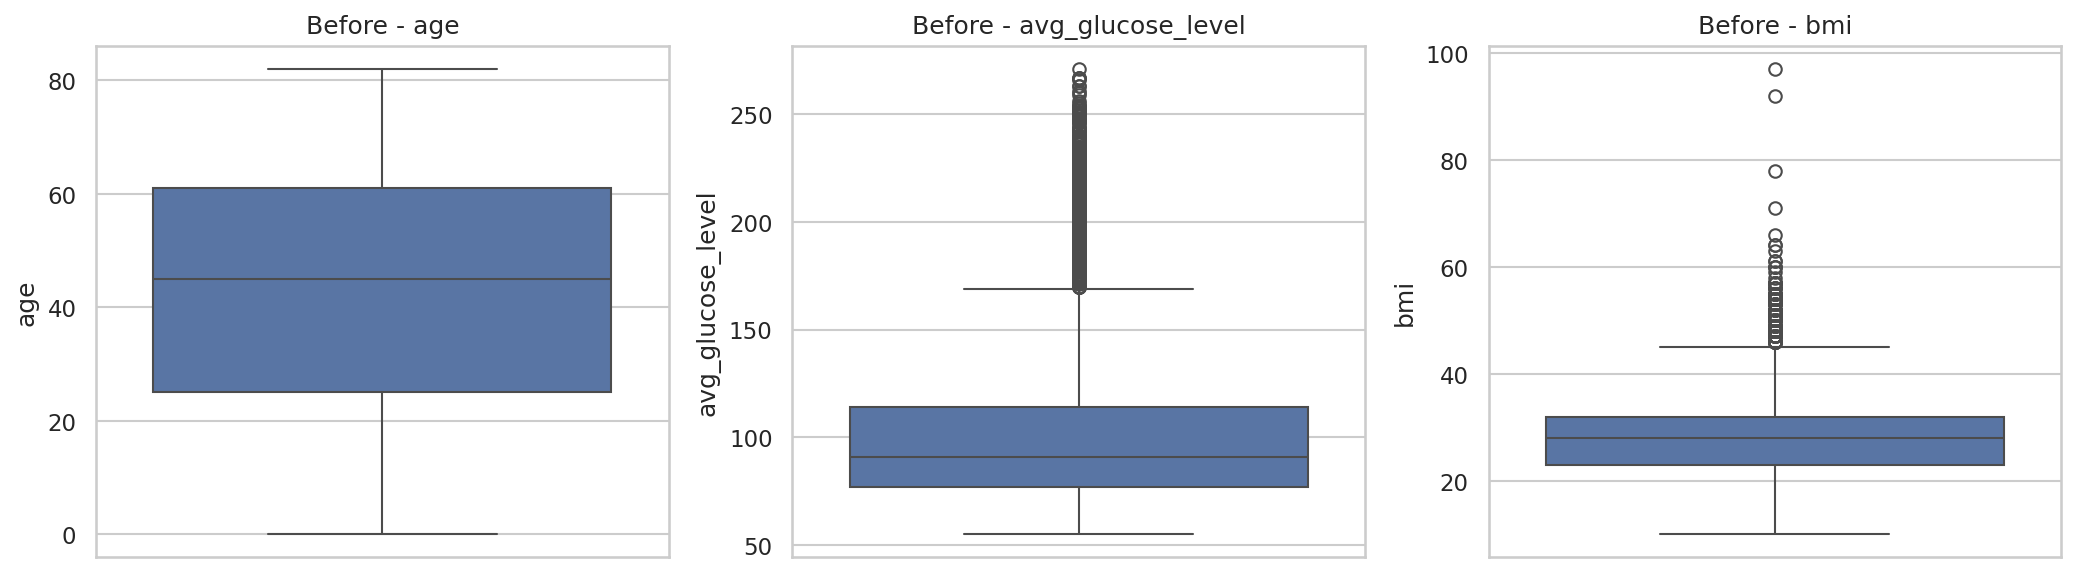

Rows removed by IQR method: 719
After outlier removal: 4391 rows, 28 columns


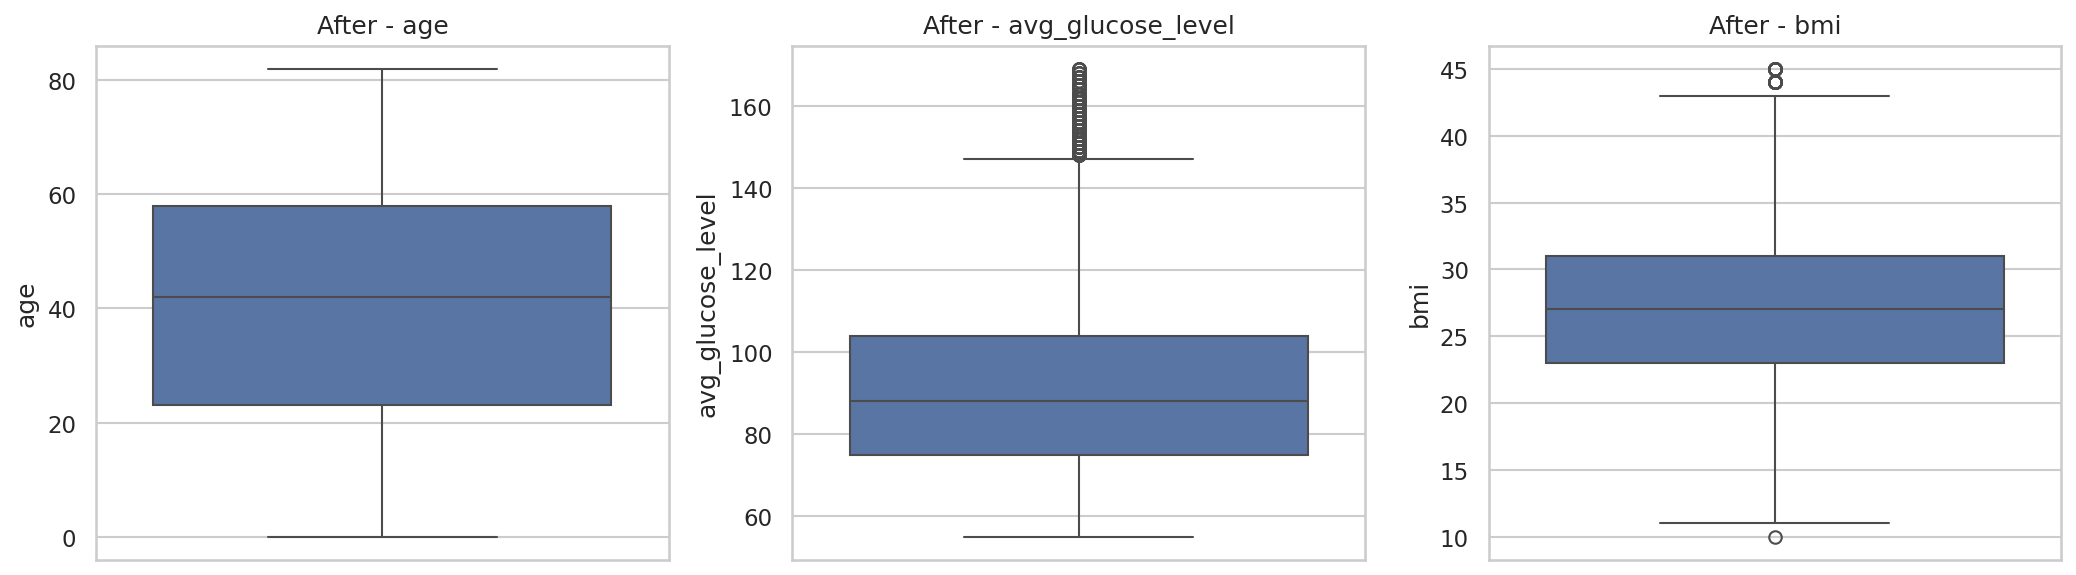

Saved: data/processed/member3_outliers_removed.csv


In [8]:
# Member 3 IT24200536-Karunarathna B.G.C.N.S: Outlier detection & IQR removal

df = pd.read_csv("data/processed/member2_onehot.csv")
report_shape("Original", df)

cont_cols = ['age', 'avg_glucose_level', 'bmi']
print("Continuous numeric columns:", cont_cols)

# Boxplots before
fig, axes = plt.subplots(1, len(cont_cols), figsize=(14,4))
for i,c in enumerate(cont_cols):
    sns.boxplot(y=df[c], ax=axes[i])
    axes[i].set_title(f"Before - {c}")
plt.tight_layout()
plt.savefig("plots/member3_boxplots_before.png")
plt.show()

#IQR outlier removal
def remove_outliers_iqr(df_, cols, k=1.5):
    df_clean = df_.copy()
    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower, upper = Q1 - k*IQR, Q3 + k*IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

df_clean = remove_outliers_iqr(df, cont_cols, k=1.5)
print(f"Rows removed by IQR method: {df.shape[0] - df_clean.shape[0]}")

report_shape("After outlier removal", df_clean)

# Boxplots after
fig, axes = plt.subplots(1, len(cont_cols), figsize=(14,4))
for i,c in enumerate(cont_cols):
    sns.boxplot(y=df_clean[c], ax=axes[i])
    axes[i].set_title(f"After - {c}")
plt.tight_layout()
plt.savefig("plots/member3_boxplots_after.png")
plt.show()

os.makedirs("data/processed", exist_ok=True)
df_clean.to_csv("data/processed/member3_outliers_removed.csv", index=False)
print("Saved: data/processed/member3_outliers_removed.csv")

Original: 4391 rows, 28 columns
Numeric columns to scale: ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke', 'gender_enc', 'ever_married_enc', 'work_type_enc', 'Residence_type_enc', 'smoking_status_enc', 'gender_Female', 'gender_Male', 'gender_Other', 'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']


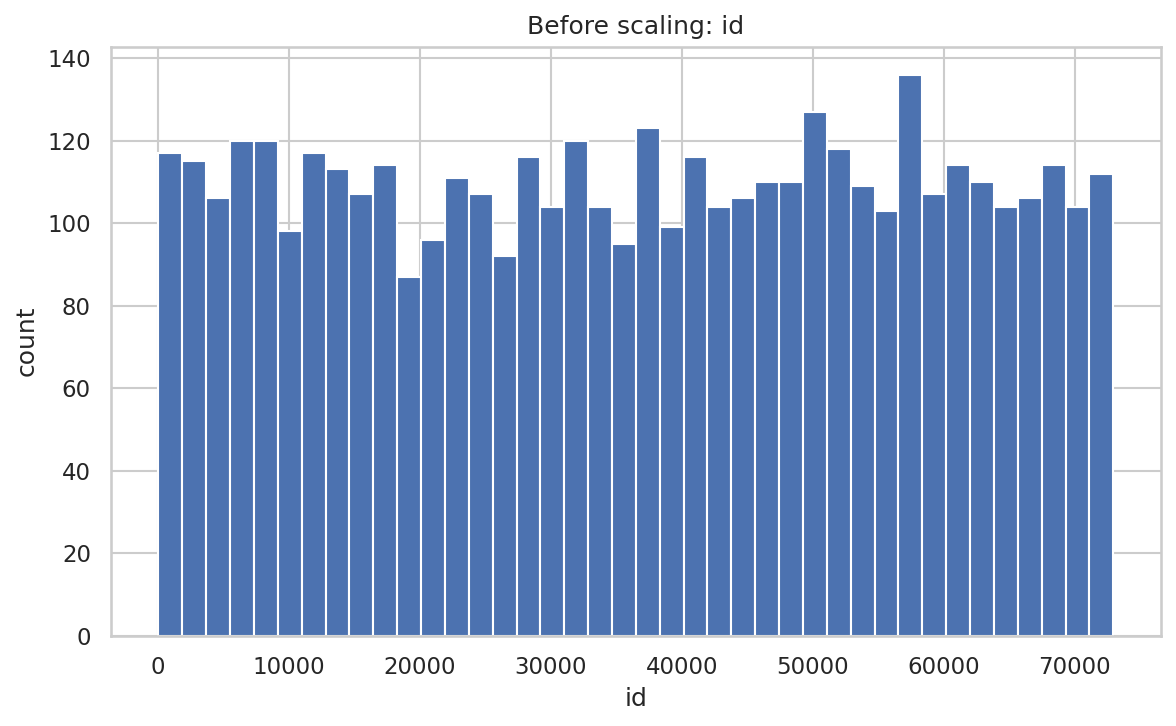

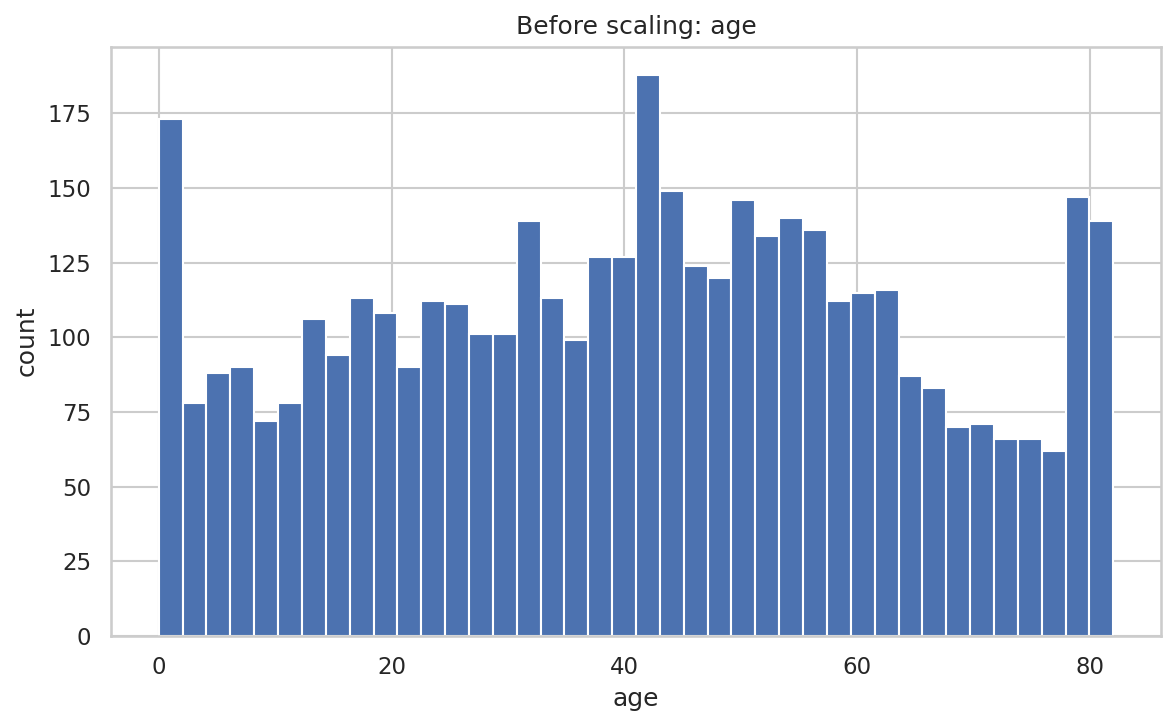

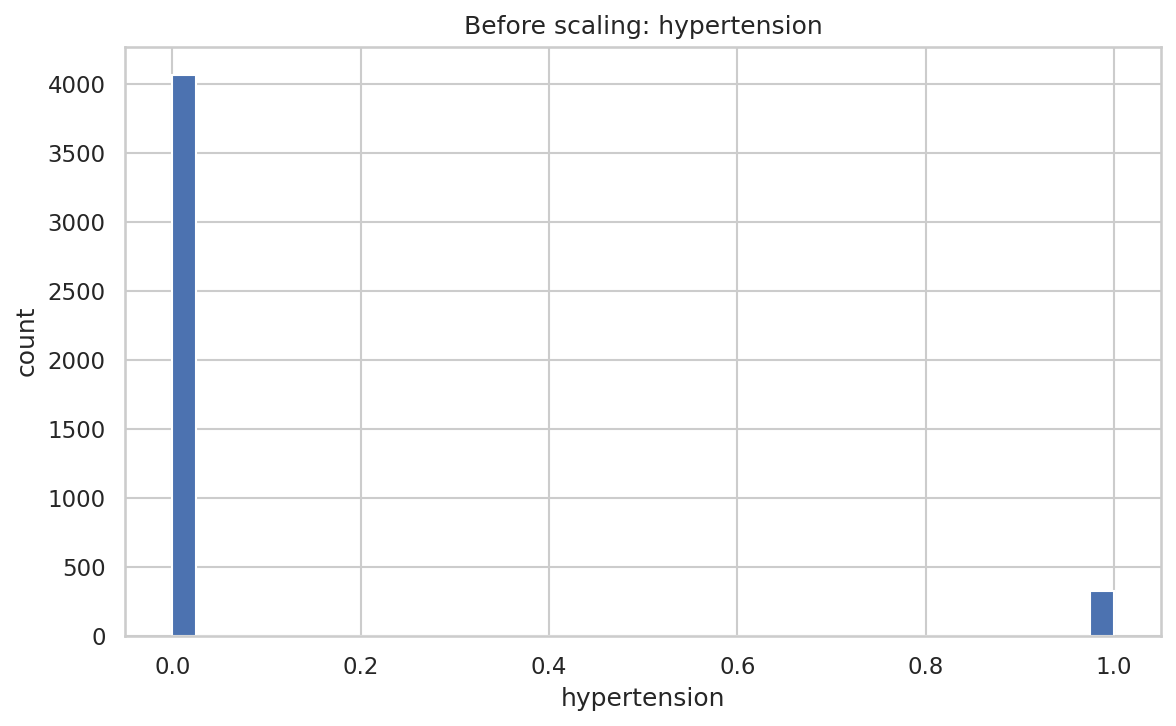

After StandardScaler: 4391 rows, 28 columns


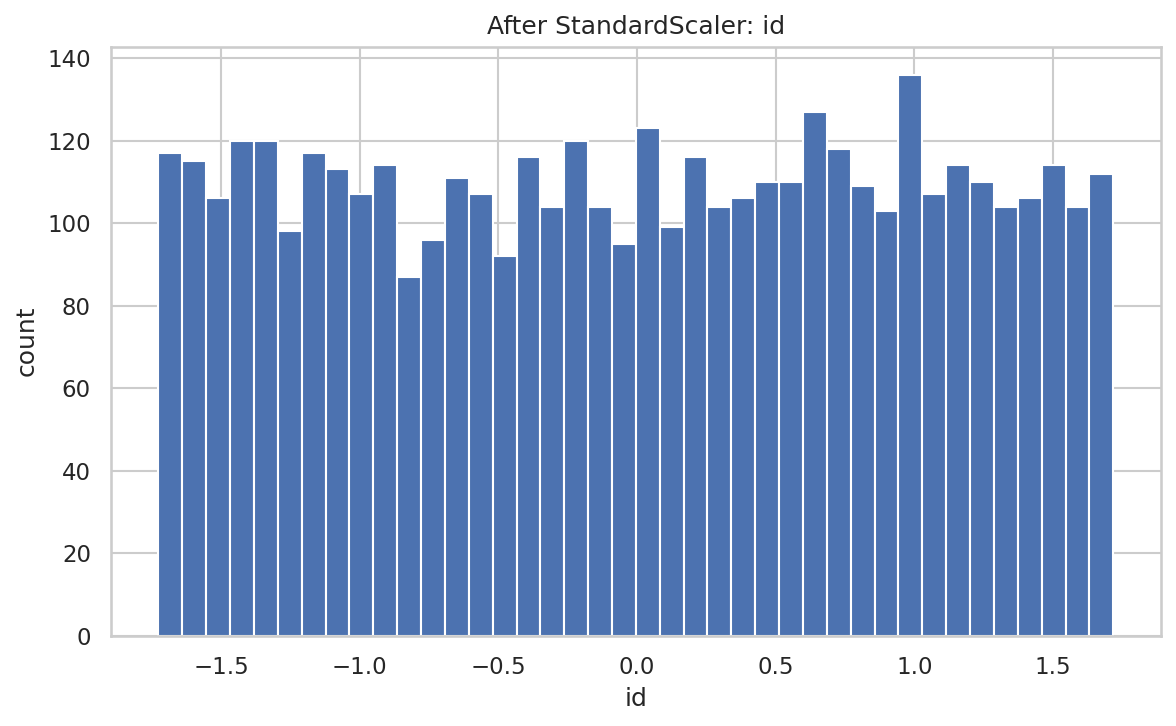

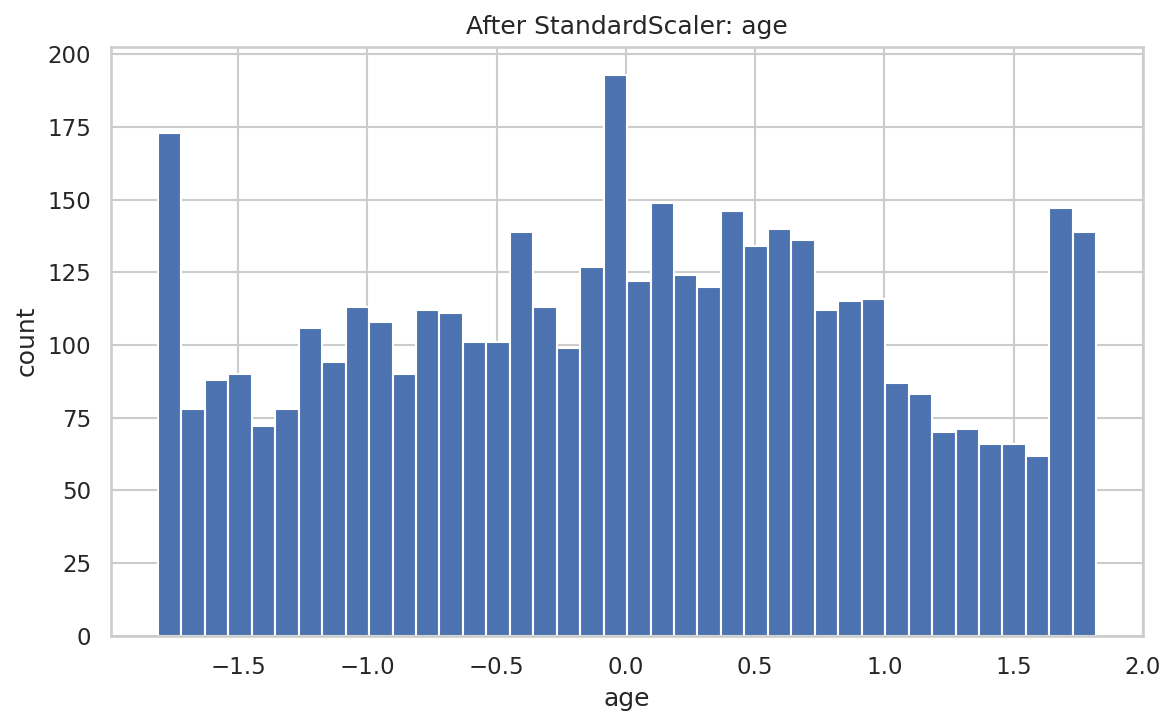

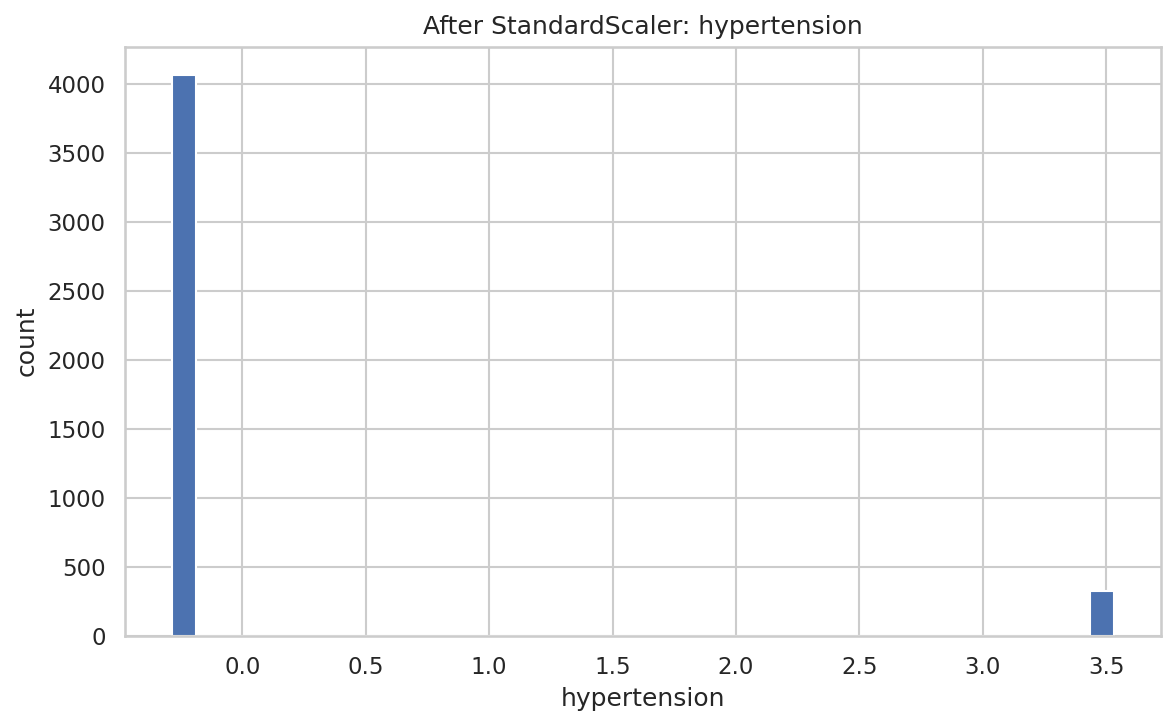

After MinMaxScaler: 4391 rows, 28 columns
Saved: data/processed/member4_scaled_standard.csv


In [9]:
# Member 4 IT24101991- Kalanchige I.R: Scaling (StandardScaler & MinMax) with before/after histograms
df = pd.read_csv("data/processed/member3_outliers_removed.csv")
report_shape("Original", df)

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns to scale:", num_cols)

# Histograms before for first 3 numeric columns
cols_to_plot = num_cols[:3]
for c in cols_to_plot:
    plt.figure()
    plt.hist(df[c].dropna(), bins=40)
    plt.title(f"Before scaling: {c}")
    plt.xlabel(c)
    plt.ylabel("count")
    plt.tight_layout()
    plt.savefig(f"plots/member4_before_{c}.png")
    plt.show()

# Apply StandardScaler
scaler = StandardScaler()
df_std = df.copy()
df_std[num_cols] = scaler.fit_transform(df_std[num_cols].astype(float))

report_shape("After StandardScaler", df_std)

# Histograms after StandardScaler
for c in cols_to_plot:
    plt.figure()
    plt.hist(df_std[c].dropna(), bins=40)
    plt.title(f"After StandardScaler: {c}")
    plt.xlabel(c)
    plt.ylabel("count")
    plt.tight_layout()
    plt.savefig(f"plots/member4_after_std_{c}.png")
    plt.show()

#MinMax
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
df_mm = df.copy()
df_mm[num_cols] = mm.fit_transform(df_mm[num_cols].astype(float))
report_shape("After MinMaxScaler", df_mm)

os.makedirs("data/processed", exist_ok=True)
df_std.to_csv("data/processed/member4_scaled_standard.csv", index=False)
print("Saved: data/processed/member4_scaled_standard.csv")


Original: 4391 rows, 28 columns
Numeric columns: ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke', 'gender_enc', 'ever_married_enc', 'work_type_enc', 'Residence_type_enc', 'smoking_status_enc', 'gender_Female', 'gender_Male', 'gender_Other', 'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']
Created features: ratio_id_age sum_id_age
Rows dropped due to NaN/inf after feature creation: 0
After feature engineering: 4391 rows, 30 columns
Columns added: 2


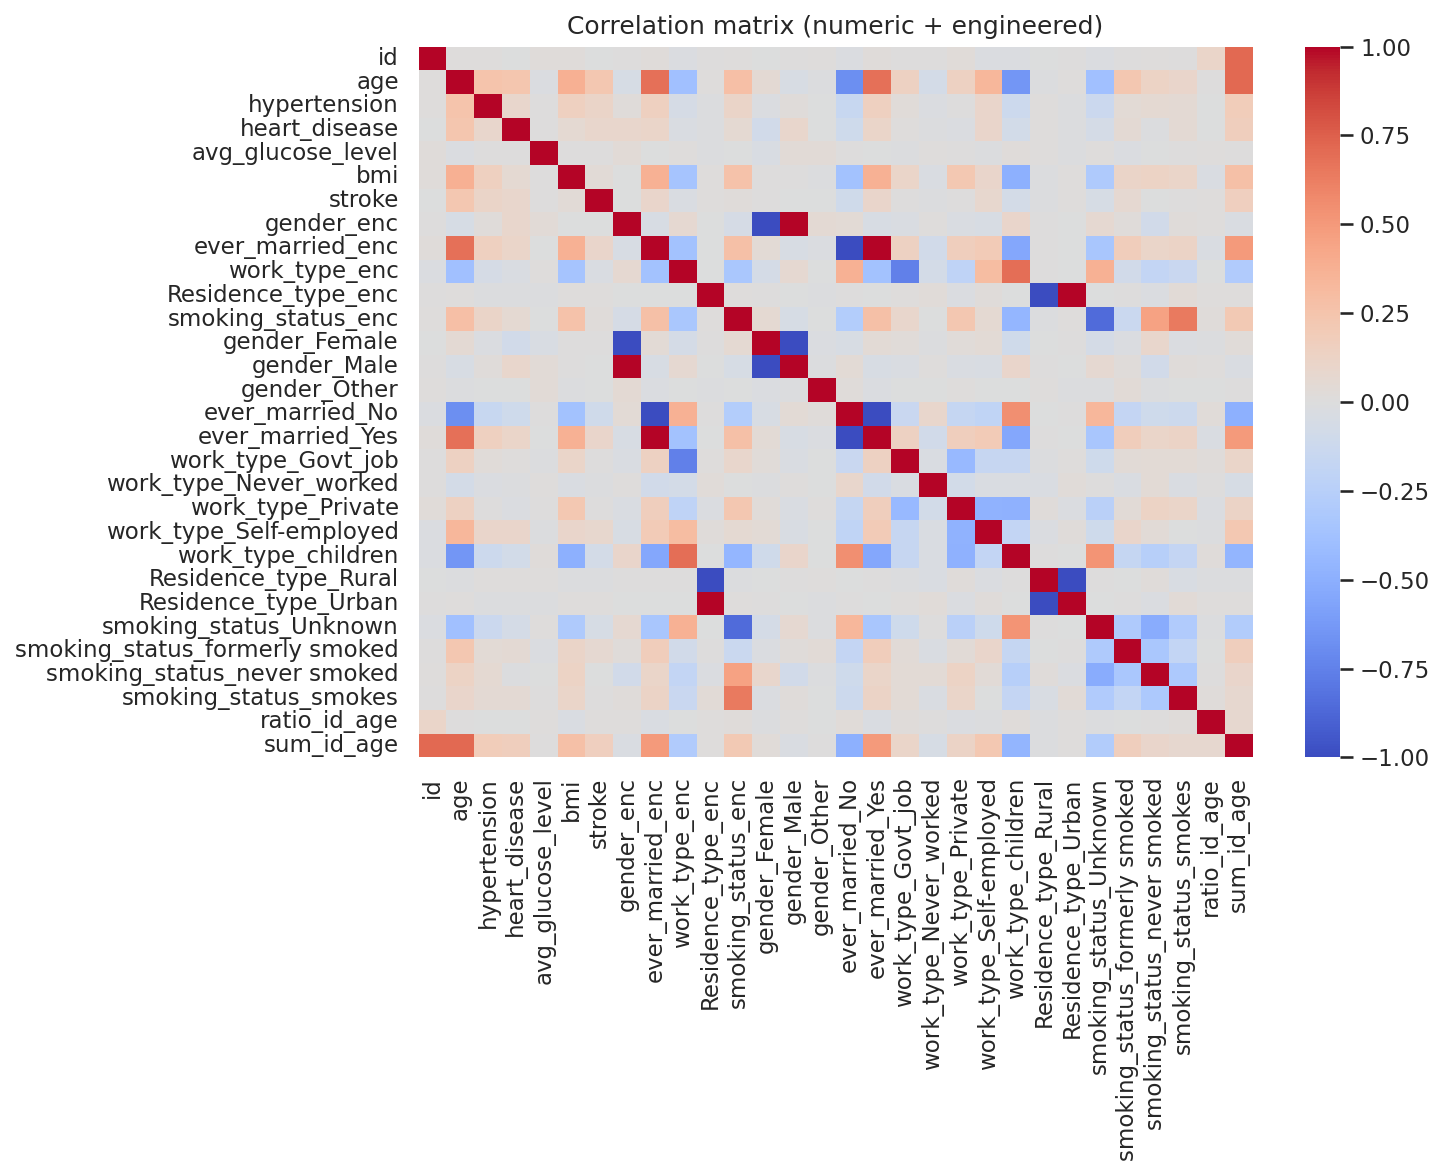

Saved: data/processed/member5_features.csv


In [ ]:
# Member 5 IT24101931-Hettiarachige G.D.P: Feature engineering & correlation based quick selection
df = pd.read_csv("data/processed/member4_scaled_standard.csv")
report_shape("Original", df)

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:", num_cols)

# sum & ratio of first two numeric cols
df_feat = df.copy()
if len(num_cols) >= 2:
    a, b = num_cols[0], num_cols[1]
    df_feat[f'ratio_{a}_{b}'] = df_feat[a] / df_feat[b].replace(0, np.nan)
    df_feat[f'sum_{a}_{b}'] = df_feat[a] + df_feat[b]
    print("Created features:", f'ratio_{a}_{b}', f'sum_{a}_{b}')

before_rows = df_feat.shape[0]
df_feat = df_feat.replace([np.inf, -np.inf], np.nan).dropna()
after_rows = df_feat.shape[0]
print(f"Rows dropped due to NaN/inf after feature creation: {before_rows - after_rows}")

report_shape("After feature engineering", df_feat)
print(f"Columns added: {df_feat.shape[1] - df.shape[1]}")

# Correlation heatmap of numeric features
plt.figure(figsize=(10,8))
sns.heatmap(df_feat.select_dtypes(include=[np.number]).corr(), cmap='coolwarm', center=0)
plt.title("Correlation matrix (numeric + engineered)")
plt.tight_layout()
plt.savefig("plots/member5_correlation_heatmap.png")
plt.show()

os.makedirs("data/processed", exist_ok=True)
df_feat.to_csv("data/processed/member5_features.csv", index=False)
print("Saved: data/processed/member5_features.csv")


Original: 4391 rows, 30 columns
Numeric-only rows used for PCA: 4391 rows, 30 columns
Explained variance ratio: [0.19653382 0.10089568]
After PCA (pca_df): 4391 rows, 3 columns


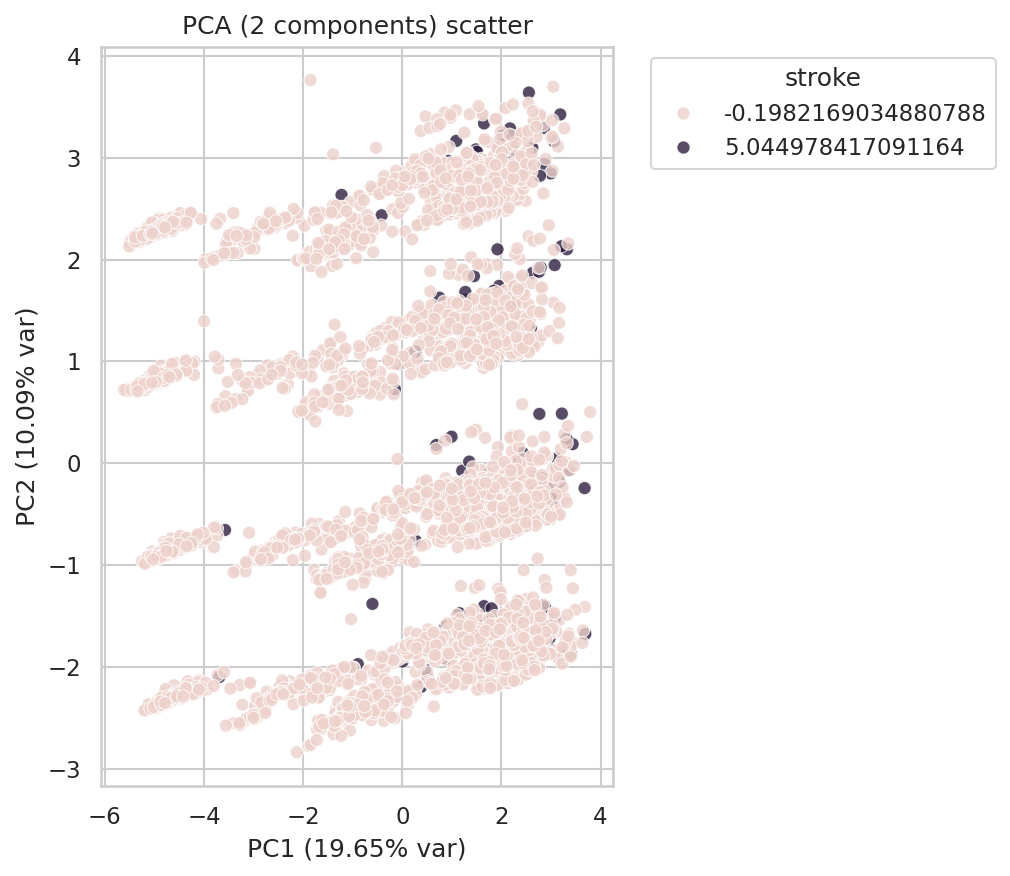

Saved: data/processed/member6_pca2.csv


In [ ]:
# Member 6 IT24101843- Dharmadasa K.A.Y.T.H.: PCA to 2 components + plot
df = pd.read_csv("data/processed/member5_features.csv")
report_shape("Original", df)

#choose numeric columns and drop rows with NA for PCA
num_df = df.select_dtypes(include=[np.number]).dropna()
report_shape("Numeric-only rows used for PCA", num_df)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(num_df)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print("Explained variance ratio:", pca.explained_variance_ratio_)

pca_df = pd.DataFrame(X_pca, columns=['PC1','PC2'])
#attach target
target_col = None
for guess in ['stroke','target','label','Outcome','y']:
    if guess in df.columns:
        target_col = guess
        pca_df[target_col] = df.loc[num_df.index, guess].values
        break

report_shape("After PCA (pca_df)", pca_df)

# Plot PCA scatter
plt.figure(figsize=(7,6))
if target_col:
    sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue=target_col, s=40, alpha=0.8)
    plt.legend(title=target_col, bbox_to_anchor=(1.05,1), loc='upper left')
else:
    plt.scatter(pca_df['PC1'], pca_df['PC2'], s=30, alpha=0.7)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.2%} var)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.2%} var)")
plt.title("PCA (2 components) scatter")
plt.tight_layout()
plt.savefig("plots/member6_pca_scatter.png", bbox_inches='tight')
plt.show()

os.makedirs("data/processed", exist_ok=True)
pca_df.to_csv("data/processed/member6_pca2.csv", index=False)
print("Saved: data/processed/member6_pca2.csv")

